In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
F = lambda x,y : x**2+y**2 <= 1

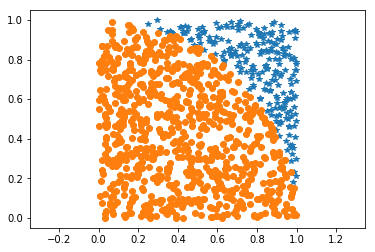

In [6]:

X = np.random.uniform(0, 1, (1024, 2))
plt.axis('equal')
plt.plot(X[:,0], X[:,1], '*')

X_in_circle = X[X[:,0]**2+X[:,1]**2<=1,:]


plt.plot(X_in_circle[:,0], X_in_circle[:,1], 'o')


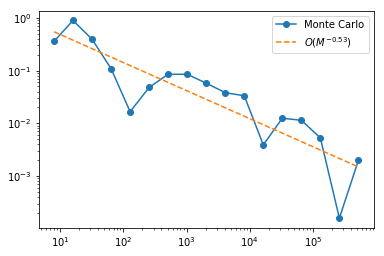

In [7]:
# Do a convergence test
Ms = 2**np.arange(3,20)
errors_mc = []

for M in Ms:
    X = np.random.uniform(0,1,(M, 2))
    pi_approx_mc = 4*np.sum(F(X[:,0], X[:,1]))/M
    
    
    error_mc = abs(np.pi - pi_approx_mc)
    errors_mc.append(error_mc)
   
    
plt.loglog(Ms, errors_mc, '-o', label="Monte Carlo")
poly = np.polyfit(np.log(Ms), np.log(errors_mc), 1)
plt.loglog(Ms, np.exp(poly[1])*Ms**poly[0], '--', label='$O(M^{%.2f})$' % poly[0])
plt.legend()
plt.show()


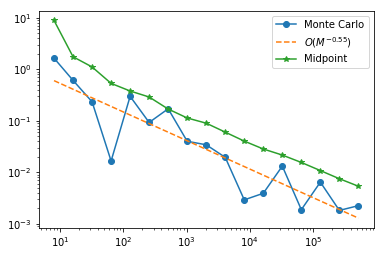

In [8]:
# Do a convergence test
Ms = 2**np.arange(3,20)
errors_mc = []
errors_midpoint = []
errors_1d = []
for M in Ms:
    X = np.random.uniform(0,1,(M, 2))
    pi_approx_mc = 4*np.sum(F(X[:,0], X[:,1]))/M
    
    
    error_mc = abs(np.pi - pi_approx_mc)
    errors_mc.append(error_mc)
    
    x, y = np.mgrid[0:1:int(np.sqrt(M))*1j, 0:1:int(np.sqrt(M))*1j]
    dx = x[1,0]-x[0,0]
    pi_approx_midpoint = 4*np.sum(F(x, y))*dx**2
    
    errors_midpoint.append(abs(np.pi - pi_approx_midpoint))
    
    
plt.loglog(Ms, errors_mc, '-o', label="Monte Carlo")
poly = np.polyfit(np.log(Ms), np.log(errors_mc), 1)
plt.loglog(Ms, np.exp(poly[1])*Ms**poly[0], '--', label='$O(M^{%.2f})$' % poly[0])
plt.loglog(Ms, errors_midpoint, '-*', label="Midpoint")
plt.legend()
plt.show()